In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
column_names = [
    "Water",
    "Food energy",
    "Protein",
    "Total lipids (fat)",
    "Ash",
    "Carbohydrate",
    "Total dietary fiber",
    "Total sugars",
    "Calcium",
    "Iron",
    "Magnesium",
    "Phosphorus",
    "Potassium",
    "Sodium",
    "Zinc",
    "Copper",
    "Manganese",
    "Selenium",
    "Vitamin C",
    "Thiamin",
    "Riboflavin",
    "Niacin",
    "Pantothenic acid",
    "Vitamin B6",
    "Total Folate",
    "Folic acid",
    "Food Folate",
    "Folate",
    "Vitamin B12",
    "Vitamin A",
    "VitA",
    "Retinol",
    "Vitamin E",
    "Vitamin K",
    "Alpha-carotene",
    "Beta-carotene",
    "Beta-cryptoxanthin",
    "Lycopene",
    "Lutein + zeaxanthin",
    "Saturated fatty acid",
    "Monounsaturated fatty acids",
    "Polyunsaturated fatty acids",
    "Cholesterol",
    "1st household weight from Weight file",
    "2nd household weight from Weight file",
    "Percent refuse"
]

In [3]:
x1 = pd.read_csv("x1.csv", header=None, names=column_names)
x2 = pd.read_csv("x2.csv", header=None, names=column_names)
x3 = pd.read_csv("x3.csv", header=None, names=column_names)

In [4]:
c1 = pd.read_csv("c1.csv", header=None, names=['Gt'])
c2 = pd.read_csv("c2.csv", header=None, names=['Gt'])
c1

,Gt
0,5
1,9
2,5
3,2
4,7
...,...
893,9
894,9
895,3
896,5


In [5]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Water                                  898 non-null    float64
 1   Food energy                            898 non-null    float64
 2   Protein                                898 non-null    float64
 3   Total lipids (fat)                     898 non-null    float64
 4   Ash                                    898 non-null    float64
 5   Carbohydrate                           898 non-null    float64
 6   Total dietary fiber                    898 non-null    float64
 7   Total sugars                           898 non-null    float64
 8   Calcium                                898 non-null    float64
 9   Iron                                   898 non-null    float64
 10  Magnesium                              898 non-null    float64
 11  Phosph

In [6]:
c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gt      898 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


# Problem 3a - 1 Neighbor Classifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
## !pip install threadpoolctl==3.1.0

In [8]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x1, np.ravel(c1))

KNeighborsClassifier(n_neighbors=1)

In [9]:
c_hat = knn.predict(x2)

In [10]:
accuracy = accuracy_score(c_hat, c2)
print("accuracy: ", accuracy)

accuracy:  0.8504464285714286


In [11]:
matrix = confusion_matrix(c_hat, c2)
matrix

array([[ 87,   0,   4,   6,   5,   1,   2,   1,   0,   0],
       [  0, 150,   2,   2,   0,   4,   2,   0,   0,   0],
       [  1,   7,  61,   3,   2,   2,   0,   2,   0,   0],
       [  3,   0,   1,  47,   1,   0,   1,   0,   0,   0],
       [  4,   2,   0,   5,  55,   1,   0,   1,   1,   0],
       [  0,   8,   1,   4,   2,  40,   1,   1,   0,   0],
       [  2,   1,   1,   3,   0,   2,  73,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0,  59,   4,   5],
       [  0,   1,   0,   1,   1,   0,   0,   5, 146,  13],
       [  0,   0,   0,   0,   0,   0,   1,   2,   7,  44]])

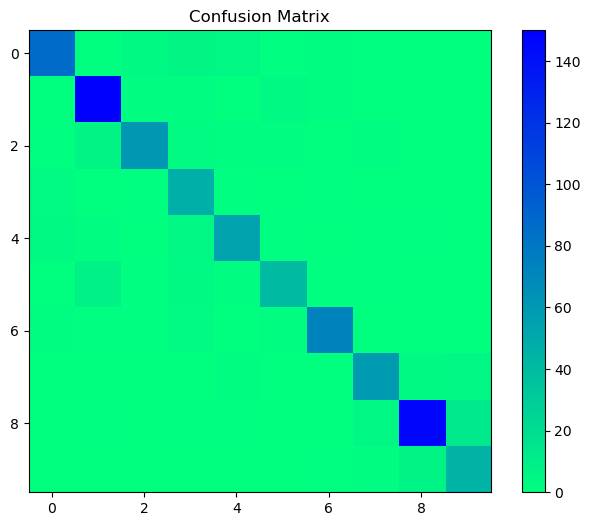

In [12]:
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest', cmap ='winter_r')
plt.title("Confusion Matrix")
plt.colorbar()

In [13]:
merged_x = pd.concat([x1, x2], ignore_index=True)
merged_y = pd.concat([c1, c2], ignore_index=True)
merged_x['Gt'] = merged_y
shuffled_df = merged_x.sample(frac=1.0, random_state = 93) 
split_df_1 = shuffled_df.head(x1.shape[0]//2)
split_df_2 = shuffled_df.tail(x1.shape[0]//2)
split_y1 = split_df_1['Gt']
split_y2 = split_df_2['Gt']
split_x1 = split_df_1.drop(columns=["Gt"])
split_x2 = split_df_2.drop(columns=["Gt"])

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(split_x1, split_y1)

y_hat = knn.predict(split_x2)
accuracy = accuracy_score(y_hat, split_y2)

print("accuracy: ", accuracy)

accuracy:  0.7461024498886414


In [14]:
def testKnn(n_neighbors):
    merged_x = pd.concat([x1, x2], ignore_index=True)
    merged_y = pd.concat([c1, c2], ignore_index=True)
    merged_x['Gt'] = merged_y
    shuffled_df = merged_x.sample(frac=1.0, random_state = 93) 
    split_df_1 = shuffled_df.head(x1.shape[0]//2)
    split_df_2 = shuffled_df.tail(x1.shape[0]//2)
    split_y1 = split_df_1['Gt']
    split_y2 = split_df_2['Gt']
    split_x1 = split_df_1.drop(columns=["Gt"])
    split_x2 = split_df_2.drop(columns=["Gt"])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(split_x1, split_y1)

    y_hat = knn.predict(split_x2)
    accuracy = accuracy_score(y_hat, split_y2)

    
    return accuracy

In [15]:
neighbors = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 100]
knn_results = []

for i in neighbors:
    knn_results.append(testKnn(i))


In [16]:
knn_avg = sum(knn_results)/12

In [17]:
from scipy import stats




# Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(knn_results, knn_avg)


print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.0
P-Value: 1.0


# Problem 3b - KFold Validation

In [27]:
def testKnn2():

    merged_x = pd.concat([x1, x2], ignore_index=True)
    merged_y = pd.concat([c1, c2], ignore_index=True)
    merged_x['Gt'] = merged_y
    shuffled_df = merged_x.sample(frac=1.0) 
    split_df_1 = shuffled_df.head(x1.shape[0]//2)
    split_df_2 = shuffled_df.tail(x1.shape[0]//2)
    split_y1 = split_df_1['Gt']
    split_y2 = split_df_2['Gt']
    split_x1 = split_df_1.drop(columns=["Gt"])
    split_x2 = split_df_2.drop(columns=["Gt"])
    
    neighbors = [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50, 100]
    

    output = []
    for i in neighbors:

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(split_x1, split_y1)

        y_hat = knn.predict(split_x2)
        accuracy = accuracy_score(y_hat, split_y2)
        output.append(accuracy)
        
    ## print(output)
        

    
    return output

In [29]:
results = [] ## 2d array, each entry is an array of 1n, 2n, 3n...
for i in range(100):
    results.append(testKnn2())

In [30]:
results

[[0.7973273942093542,
  0.7706013363028953,
  0.7661469933184856,
  0.7706013363028953,
  0.7394209354120267,
  0.734966592427617,
  0.6948775055679287,
  0.6748329621380846,
  0.643652561247216,
  0.6057906458797327,
  0.5501113585746102,
  0.45434298440979953],
 [0.7951002227171492,
  0.779510022271715,
  0.7817371937639198,
  0.7616926503340757,
  0.732739420935412,
  0.6770601336302895,
  0.6614699331848553,
  0.6458797327394209,
  0.5946547884187082,
  0.5278396436525612,
  0.48997772828507796,
  0.45657015590200445],
 [0.7906458797327395,
  0.779510022271715,
  0.7683741648106904,
  0.7394209354120267,
  0.7527839643652561,
  0.7037861915367484,
  0.6837416481069042,
  0.6703786191536748,
  0.6547884187082406,
  0.6013363028953229,
  0.5657015590200446,
  0.46770601336302897],
 [0.8262806236080178,
  0.7928730512249443,
  0.8106904231625836,
  0.8084632516703786,
  0.8017817371937639,
  0.7616926503340757,
  0.7371937639198218,
  0.7037861915367484,
  0.6280623608017817,
  0.5746

In [36]:
results_np = np.transpose(np.array(results))
print(results_np)

[[0.79732739 0.79510022 0.79064588 ... 0.79955457 0.79732739 0.78396437]
 [0.77060134 0.77951002 0.77951002 ... 0.71937639 0.75723831 0.75723831]
 [0.76614699 0.78173719 0.76837416 ... 0.72160356 0.78619154 0.74610245]
 ...
 [0.60579065 0.52783964 0.6013363  ... 0.57461024 0.59688196 0.57461024]
 [0.55011136 0.48997773 0.56570156 ... 0.53229399 0.5389755  0.54342984]
 [0.45434298 0.45657016 0.46770601 ... 0.47438753 0.48106904 0.45434298]]


In [41]:
import scipy.stats as stats


# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*results_np)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1633.5735700465425
p-value: 0.0


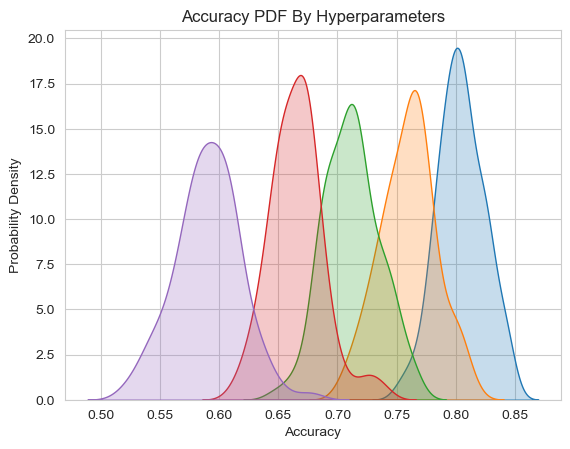

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'data' with your list of numbers
data = results_np[0]

# Create a KDE plot
sns.set_style("whitegrid")
sns.kdeplot(data, fill=True)
sns.kdeplot(results_np[3], fill=True)
sns.kdeplot(results_np[5], fill=True)
sns.kdeplot(results_np[7], fill=True)
sns.kdeplot(results_np[9], fill=True)

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Probability Density')
plt.title('Accuracy PDF By Hyperparameters')

# Display the plot
plt.show()

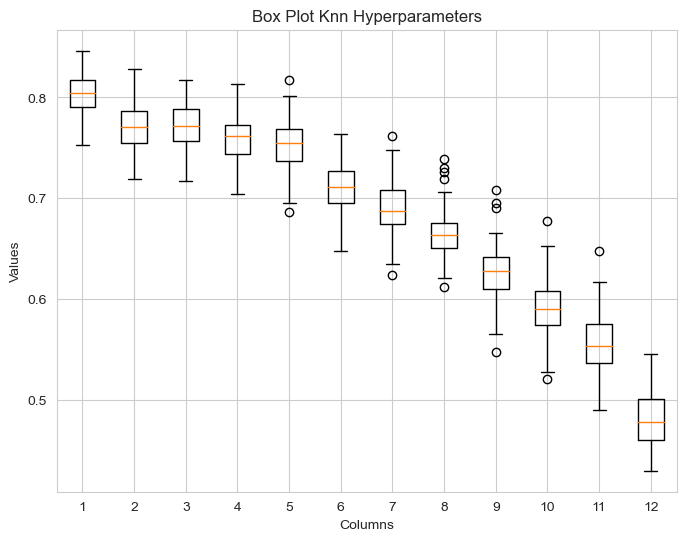

In [61]:
# Create a box plot for each column in the 2D array
plt.figure(figsize=(8, 6))
plt.boxplot(np.transpose(results_np))

# Add labels and title
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plot Knn Hyperparameters")

# Display the plot
plt.grid(True)
plt.show()

# Problem 3c - Classifier not in lecture 8

In [92]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler

In [98]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x1, c1)

/Users/simonsprouse/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/simonsprouse/anaconda3/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

<BarContainer object of 10 artists>

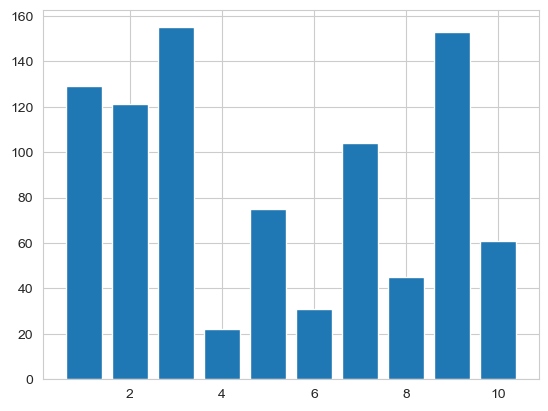

In [99]:
y_hat = QDA.predict(x2)
uniques, counts = np.unique(y_hat, return_counts=True)
plt.bar(uniques, counts)

In [100]:
accuracy_score(y_hat, c2)

0.7243303571428571

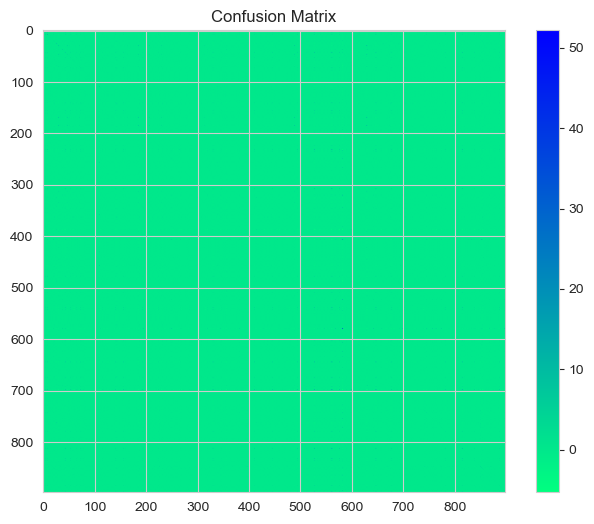

In [105]:
matrix = np.cov(x1)
plt.figure(figsize=(8, 6))
plt.imshow(matrix, interpolation='nearest', cmap ='winter_r')
plt.title("Confusion Matrix")
plt.colorbar()

# Problem 3d - Predict C3

In [109]:
merged_x = pd.concat([x1, x2], ignore_index=True)
merged_y = pd.concat([c1, c2], ignore_index=True)

In [110]:
from sklearn.linear_model import LogisticRegression

In [119]:
log_reg = LogisticRegression()
log_reg.fit(merged_x, np.ravel(merged_y))

/Users/simonsprouse/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
y_hat = log_reg.predict(x3)

In [121]:
c3 = pd.Series(y_hat)
c3.to_csv("c3.csv", index=False)